In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.stattools import coint 
from statsmodels.regression.rolling import RollingOLS

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import time

In [ ]:
# data downloading and reading
"""
XLK ETF top 23 components (Technology, 'APP' 'PLTR' removed due to low historical data): 
['NVDA', 'AAPL', 'MSFT', 'AVGO', , 'AMD', 'CSCO', 'ORCL', 'IBM', 'MU',
               'CRM', 'AMAT', 'LRCX', 'QCOM', 'INTU', 'APH', 'NOW', 'INTC', 'ACN',
               'KLAC', 'TXN', 'ADBE', 'ANET', 'ADI']

XLRE ETF top 30 components (Real Estate):
['WELL', 'PLD', 'AMT', 'EQIX', 'SPG', 'CBRE', 'O', 'PSA', 'DLR', 'CCI',
               'VTR', 'VICI', 'CSGP', 'EXR', 'AVB', 'IRM', 'EQR', 'SBAC', 'ESS', 'WY',
               'MAA', 'INVH', 'KIM', 'DOC', 'REG', 'CPT', 'HST', 'UDR', 'BXP', 'ARE']

XLP ETF top 29 components (Consumer Staples, 'KVUE' removed due to low historical data):
['WMT', 'COST', 'PG', 'KO', 'PM', 'PEP', 'CL', 'MDLZ', 'MO', 'MNST',
               'TGT', 'KR', 'KDP', 'SYY', 'KMB', 'ADM', 'HSY', 'GIS', 'DG',
               'EL', 'K', 'KHC', 'DLTR', 'CHD', 'STZ', 'MKC', 'TSN', 'BG', 'CLX']

XLI ETF top 29 components (Industrial, 'GEV' removed due to low historical data):
['GE', 'CAT', 'RTX', 'UBER', 'BA', 'UNP', 'ETN', 'HON', 'DE',
               'PH', 'ADP', 'TT', 'MMM', 'LMT', 'GD', 'HWM', 'WM', 'TDG', 'JCI',
               'EMR', 'NOC', 'UPS', 'CMI', 'PWR', 'ITW', 'NSC', 'CSX', 'CTAS', 'FDX']

Common tickers:
['NVDA', 'AAPL', 'MSFT', 'META', 'AMZN', 'GOOGL', 'TSLA', 'V', 'WMT', 'RACE', 'PFE', 'BABA', 
'NFLX', 'MC.PA', 'ZM', 'T', 'BAC', 'ALV.DE', 'IBE1.F', 'VOW3.DE', 'DBK.DE', 'BAYN.DE', 'AF.PA']

"""
# Symbols to download
symbol_list = ['NVDA', 'AAPL', 'MSFT', 'META', 'AMZN', 'GOOGL', 'TSLA', 'V', 'WMT', 'RACE', 'PFE', 'BABA', 
                'NFLX', 'MC.PA', 'ZM', 'T', 'BAC', 'ALV.DE', 'IBE1.F', 'VOW3.DE', 'DBK.DE', 'BAYN.DE', 'AF.PA']

# # set the dates range
# start_date = '2020-01-01'
# end_date = dt.datetime.now().strftime('%Y-%m-%d')

# # download data
# # data = yf.download(symbol_list, period="max", group_by='ticker', auto_adjust=True)
# data = yf.download(symbol_list, start=start_date, end=end_date, group_by='ticker', auto_adjust=True)

# # download data to csv
# data.to_csv(f"{'_'.join(symbol_list)}_D_data.csv")

# Load the CSV with MultiIndex columns (Tickers, OHLCV)
data = pd.read_csv(f"{'_'.join(symbol_list)}_D_data.csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
data = data.dropna(how='all')

# Convert all values to float
data = data.astype(float)

# Show the result
data.head()

[*********************100%***********************]  23 of 23 completed


Ticker             ZM                                                   AMZN  \
Price            Open       High        Low      Close     Volume       Open   
Date                                                                           
2020-01-02  68.800003  69.235001  68.019997  68.720001  1315500.0  93.750000   
2020-01-03  67.620003  68.680000  67.099998  67.279999  1127900.0  93.224998   
2020-01-06  66.629997  70.495003  65.811996  70.320000  3151600.0  93.000000   
2020-01-07  70.290001  72.838997  69.370003  71.900002  6985400.0  95.224998   
2020-01-08  71.809998  73.290001  71.029999  72.550003  2482300.0  94.902000   

Ticker                                                   ...     VOW3.DE  \
Price            High        Low      Close      Volume  ...        Open   
Date                                                     ...               
2020-01-02  94.900497  93.207497  94.900497  80580000.0  ...  109.053571   
2020-01-03  94.309998  93.224998  93.748497  75288000.0  ...  111.102973   
2020-01-06  95.184502  93.000000  95.143997  81236000.0  ...  108.680955   
2020-01-07  95.694504  94.601997  95.343002  80898000.0  ...  110.009951   
2020-01-08  95.550003  94.321999  94.598503  70160000.0  ...  108.680955   

Ticker                                                        ALV.DE  \
Price             High         Low       Close    Volume        Open   
Date                                                                   
2020-01-02  112.245685  109.028725  112.096634  814205.0  161.184191   
2020-01-03  111.314132  108.680945  109.699440  948457.0  162.290208   
2020-01-06  109.687027  107.550668  109.687027  658053.0  160.115025   
2020-01-07  110.916665  109.339233  109.339233  932694.0  161.110458   
2020-01-08  109.836078  108.171702  109.811241  840853.0  160.151880   

Ticker                                                     
Price             High         Low       Close     Volume  
Date                                                       
2020-01-02  163.912375  161.036712  163.322495   846800.0  
2020-01-03  162.511404  160.483698  161.515991   997575.0  
2020-01-06  160.594308  158.677200  160.520569   842331.0  
2020-01-07  162.327077  160.631187  160.889252   905810.0  
2020-01-08  161.626575  159.156468  160.962967  1006392.0  

[5 rows x 115 columns]

In [3]:
# Print data length and date range before dropping NaNs
print(f"Initial data shape: {data.shape}")
print(f"Date range: {data.index.min()} to {data.index.max()}")

# Remove rows where all values are NaN
data = data.dropna(how='all')

# For pairs trading, we typically only need Close prices
# Extract Close prices for both tickers
close_prices = data.xs('Close', level=1, axis=1)

# Clean ticker names if needed (remove any suffixes, for forex scenario)
close_prices.columns = close_prices.columns.str.replace('=X', '', regex=False)

# Drop any remaining NaN values
close_prices = close_prices.dropna()

# Print data length and date range after dropping NaNs
print(f"Data shape after dropping all-NaN rows: {close_prices.shape}")
print(f"Date range: {close_prices.index.min()} to {close_prices.index.max()}")

print("Cleaned close prices data:")
print(close_prices.head())
print(f"\nData shape: {close_prices.shape}")
print(f"Date range: {close_prices.index.min()} to {close_prices.index.max()}")

# Use close_prices for the pairs trading analysis
data = close_prices

Initial data shape: (1537, 115)
Date range: 2020-01-02 to 2025-12-10
Data shape after dropping all-NaN rows: (1475, 23)
Date range: 2020-01-02 to 2025-12-10
Cleaned close prices data:
Ticker             ZM       AMZN           V        BABA       NFLX  \
Date                                                                  
2020-01-02  68.720001  94.900497  183.186234  208.714478  32.980999   
2020-01-03  67.279999  93.748497  181.729340  206.083832  32.590000   
2020-01-06  70.320000  95.143997  181.336365  205.741928  33.583000   
2020-01-07  71.900002  95.343002  180.857117  206.682114  33.075001   
2020-01-08  72.550003  94.598503  183.953018  207.033508  33.925999   

Ticker           AAPL        WMT       TSLA       MC.PA        PFE  ...  \
Date                                                                ...   
2020-01-02  72.468254  36.508102  28.684000  380.116364  27.955412  ...   
2020-01-03  71.763725  36.185799  29.534000  380.071014  27.805422  ...   
2020-01-06  72.335

In [4]:
# # manual filter to keep Date >= '2014-01-01'
# data = data[data.index >= '2014-01-01']

# # manual filter to exclude Date >= '2024-01-01'
# data = data[data.index < '2024-01-01']

In [5]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [6]:
# Time Series Split for Pairs Trading
# For financial time series, we use temporal split instead of random split
# This preserves the time order and avoids look-ahead bias
def temporal_split(data, train_ratio=0.7):
    """
    Split time series data temporally (chronologically)
    
    Parameters:
    data: DataFrame with time series data
    train_ratio: proportion of data to use for training (default 70%)
    
    Returns:
    train_data: DataFrame with training period data
    test_data: DataFrame with testing period data
    split_date: the date where split occurs
    """
    n_train = int(len(data) * train_ratio)
    train_data = data.iloc[:n_train]
    test_data = data.iloc[n_train:]
    split_date = data.index[n_train-1] if n_train > 0 else data.index[0]
    
    print(f"Total observations: {len(data)}")
    print(f"Training period: {data.index[0]} to {split_date} ({len(train_data)} observations)")
    print(f"Testing period: {data.index[n_train]} to {data.index[-1]} ({len(test_data)} observations)")
    print(f"Train ratio: {len(train_data)/len(data):.1%}")
    
    return train_data, test_data, split_date

# Split the data temporally
train_data, test_data, split_date = temporal_split(data, train_ratio=0.7)

Total observations: 1475
Training period: 2020-01-02 to 2024-02-26 (1032 observations)
Testing period: 2024-02-27 to 2025-12-10 (443 observations)
Train ratio: 70.0%


In [7]:
# Step 1: Find cointegrated pairs using TRAINING data only
# This prevents look-ahead bias in the strategy
scores_train, pvalues_train, pairs_train = find_cointegrated_pairs(train_data)

print("=== TRAINING PERIOD COINTEGRATION ANALYSIS ===")
print(f"Analysis period: {train_data.index[0]} to {train_data.index[-1]}")
print(f"Number of observations: {len(train_data)}")

=== TRAINING PERIOD COINTEGRATION ANALYSIS ===
Analysis period: 2020-01-02 to 2024-02-26
Number of observations: 1032


In [8]:
# Step 2: Validate cointegration on TEST data
# Check if pairs found in training period maintain cointegration in test period
scores_test, pvalues_test, pairs_test = find_cointegrated_pairs(test_data)

print("\n=== TESTING PERIOD COINTEGRATION VALIDATION ===")
print(f"Analysis period: {test_data.index[0]} to {test_data.index[-1]}")
print(f"Number of observations: {len(test_data)}")


=== TESTING PERIOD COINTEGRATION VALIDATION ===
Analysis period: 2024-02-27 to 2025-12-10
Number of observations: 443


In [9]:
# Function to validate pairs consistency
def validate_pairs_consistency(pairs_train, pairs_test, pvalues_train, pvalues_test, data_train, data_test):
    """
    Validate if pairs found in training maintain cointegration in testing
    """
    print(f"\nPairs found in training: {len(pairs_train)}")
    print(f"Pairs found in testing: {len(pairs_test)}")

    # print names of pairs found in training
    print("\nPairs found in training period:")
    for pair in pairs_train:
        print(f"- {pair[0]} / {pair[1]}")   

    # print names of pairs found in testing
    print("\nPairs found in testing period:")
    for pair in pairs_test:
        print(f"- {pair[0]} / {pair[1]}")
    
    # Handle case when no training pairs exist
    if len(pairs_train) == 0:
        print("No pairs found in training period - cannot validate consistency")
        print("Consider:")
        print("- Relaxing cointegration threshold (e.g., p < 0.1)")
        print("- Using longer training period")
        print("- Checking data quality")
        
        # Show best pairs from training period anyway
        if len(pvalues_train) > 0:
            symbols = list(data_train.columns)
            n = len(symbols)
            
            best_train_pairs = []
            for i in range(n):
                for j in range(i+1, n):
                    best_train_pairs.append({
                        'pair': f"{symbols[i]}/{symbols[j]}",
                        'train_pvalue': pvalues_train[i, j],
                        'significant': pvalues_train[i, j] < 0.05
                    })
            
            best_train_df = pd.DataFrame(best_train_pairs)
            best_train_df = best_train_df.sort_values('train_pvalue')
            
            print(f"\nBest pairs from training (sorted by p-value):")
            print(best_train_df.head(5))
        
        return [], pd.DataFrame()
    
    # Check which training pairs are also significant in testing
    consistent_pairs = []
    validation_results = []
    
    for pair in pairs_train:
        symbol1, symbol2 = pair
        
        # Find indices for this pair in training data
        train_cols = list(data_train.columns)
        i_train = train_cols.index(symbol1)
        j_train = train_cols.index(symbol2)
        
        # Ensure upper triangular access (i < j)
        if i_train > j_train:
            i_train, j_train = j_train, i_train
        
        train_pvalue = pvalues_train[i_train, j_train]
        
        # Find indices for this pair in testing data  
        test_cols = list(data_test.columns)
        i_test = test_cols.index(symbol1)
        j_test = test_cols.index(symbol2)
        
        # Ensure upper triangular access (i < j)
        if i_test > j_test:
            i_test, j_test = j_test, i_test
        
        test_pvalue = pvalues_test[i_test, j_test]
        
        # Check if still cointegrated in test period
        is_consistent = test_pvalue < 0.05
        
        validation_results.append({
            'pair': f"{symbol1}/{symbol2}",
            'train_pvalue': train_pvalue,
            'test_pvalue': test_pvalue,
            'consistent': is_consistent,
            'pvalue_change': test_pvalue - train_pvalue
        })
        
        if is_consistent:
            consistent_pairs.append(pair)
    
    # Create validation DataFrame
    validation_df = pd.DataFrame(validation_results)
    if len(validation_df) > 0:
        validation_df = validation_df.sort_values('test_pvalue')
    
    print(f"Consistent pairs (significant in both periods): {len(consistent_pairs)}")
    if len(pairs_train) > 0:
        print(f"Consistency rate: {len(consistent_pairs)/len(pairs_train):.1%}")
    
    return consistent_pairs, validation_df

# Validate pairs consistency
consistent_pairs, validation_df = validate_pairs_consistency(
    pairs_train, pairs_test, pvalues_train, pvalues_test, train_data, test_data
)

if len(validation_df) > 0:
    print(f"\n=== PAIRS VALIDATION RESULTS ===")
    print(validation_df)
else:
    print(f"\n=== NO VALIDATION POSSIBLE ===")
    print("No cointegrated pairs found in training period")

if len(consistent_pairs) > 0:
    print("\nConsistent pairs across training and testing periods:")
    for pair in consistent_pairs:
        print(f"- {pair[0]} / {pair[1]}")


Pairs found in training: 27
Pairs found in testing: 9

Pairs found in training period:
- V / WMT
- V / MSFT
- V / NVDA
- V / RACE
- V / ALV.DE
- WMT / MSFT
- WMT / NVDA
- WMT / RACE
- WMT / ALV.DE
- IBE1.F / ALV.DE
- DBK.DE / GOOGL
- DBK.DE / MSFT
- DBK.DE / NVDA
- DBK.DE / RACE
- DBK.DE / AF.PA
- DBK.DE / BAYN.DE
- T / GOOGL
- T / META
- T / MSFT
- T / NVDA
- T / RACE
- T / VOW3.DE
- T / ALV.DE
- MSFT / ALV.DE
- AF.PA / BAYN.DE
- AF.PA / VOW3.DE
- AF.PA / ALV.DE

Pairs found in testing period:
- ZM / WMT
- ZM / TSLA
- AMZN / WMT
- AMZN / TSLA
- AMZN / BAC
- V / NFLX
- BABA / TSLA
- TSLA / BAC
- BAC / NVDA
Consistent pairs (significant in both periods): 0
Consistency rate: 0.0%

=== PAIRS VALIDATION RESULTS ===
              pair  train_pvalue  test_pvalue  consistent  pvalue_change
9    IBE1.F/ALV.DE      0.012698     0.146334       False       0.133636
17          T/META      0.013552     0.208424       False       0.194873
8       WMT/ALV.DE      0.006923     0.223329       False  

In [10]:
# # To fix later

# # Visualize cointegration results - Training vs Testing period
# fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# # Training period heatmap
# sns.heatmap(
#     pvalues_train, 
#     xticklabels=symbol_list, 
#     yticklabels=symbol_list, 
#     cmap='RdYlGn_r',  # Red = high p-value (bad), Green = low p-value (good)
#     vmin=0, 
#     vmax=0.1,  # Focus on the significant range
#     ax=axes[0],
#     annot=True,
#     fmt='.3f',
#     cbar_kws={'label': 'P-Value'}
# )
# axes[0].set_title('Training Period - Cointegration P-Values\n(Lower = Better, p < 0.05 is significant)', fontsize=14)

# # Testing period heatmap
# sns.heatmap(
#     pvalues_test, 
#     xticklabels=symbol_list, 
#     yticklabels=symbol_list, 
#     cmap='RdYlGn_r',
#     vmin=0, 
#     vmax=0.1,
#     ax=axes[1],
#     annot=True,
#     fmt='.3f',
#     cbar_kws={'label': 'P-Value'}
# )
# axes[1].set_title('Testing Period - Cointegration P-Values\n(Lower = Better, p < 0.05 is significant)', fontsize=14)

# plt.tight_layout()
# plt.show()

In [11]:
# Enhanced Backtesting Framework
# Use parameters estimated from training period and test on out-of-sample data
def estimate_hedge_ratio_and_spread(data, symbol1, symbol2):
    """
    Estimate hedge ratio and calculate spread for a pair
    Returns regression results and spread series
    """
    S1 = data[symbol1]
    S2 = data[symbol2]
    
    # Add constant for regression
    S1_const = sm.add_constant(S1)
    results = sm.OLS(S2, S1_const).fit()
    
    # Get regression coefficient (hedge ratio)
    hedge_ratio = results.params[symbol1]
    intercept = results.params['const']
    
    # Calculate spread
    spread = S2 - hedge_ratio * S1
    
    return {
        'hedge_ratio': hedge_ratio,
        'intercept': intercept,
        'results': results,
        'spread': spread,
        'spread_mean': spread.mean(),
        'spread_std': spread.std()
    }

def backtest_pair_strategy(train_data, test_data, symbol1, symbol2, z_threshold=1.0):
    """
    Backtest a pairs trading strategy:
    1. Estimate parameters on training data
    2. Apply strategy on test data with those parameters
    """
    print(f"\n=== BACKTESTING {symbol1}/{symbol2} ===")
    
    # Step 1: Estimate parameters on training data
    train_params = estimate_hedge_ratio_and_spread(train_data, symbol1, symbol2)
    
    print(f"Training Period Parameters:")
    print(f"  Hedge Ratio: {train_params['hedge_ratio']:.4f}")
    print(f"  R-squared: {train_params['results'].rsquared:.4f}")
    print(f"  Spread Mean: {train_params['spread_mean']:.4f}")
    print(f"  Spread Std: {train_params['spread_std']:.4f}")
    
    # Step 2: Apply strategy on test data using training parameters
    S1_test = test_data[symbol1]
    S2_test = test_data[symbol2]
    
    # Calculate spread using training hedge ratio
    spread_test = S2_test - train_params['hedge_ratio'] * S1_test
    
    # Calculate z-score using training mean and std
    zscore_test = (spread_test - train_params['spread_mean']) / train_params['spread_std']
    
    # Generate trading signals
    signals = pd.DataFrame(index=test_data.index)
    signals['spread'] = spread_test
    signals['zscore'] = zscore_test
    signals['position'] = 0.0
    
    # Long spread when z-score <= -threshold
    signals.loc[signals.zscore <= -z_threshold, 'position'] = 1.0
    # Short spread when z-score >= threshold  
    signals.loc[signals.zscore >= z_threshold, 'position'] = -1.0
    
    # Calculate returns
    signals['spread_returns'] = signals.spread.pct_change()
    signals['strategy_returns'] = signals.spread_returns * signals.position.shift(1)
    signals = signals.dropna()
    
    # Performance metrics
    # CORRECTED: Use compounded returns instead of cumsum
    equity_curve = (1 + signals.strategy_returns).cumprod()
    total_return = equity_curve.iloc[-1] - 1
    
    sharpe_ratio = signals.strategy_returns.mean() / signals.strategy_returns.std() * np.sqrt(252) if signals.strategy_returns.std() != 0 else 0
    win_rate = (signals[signals.strategy_returns > 0].shape[0] / 
               signals[signals.strategy_returns != 0].shape[0]) if signals[signals.strategy_returns != 0].shape[0] > 0 else 0
    
    print(f"\nOut-of-Sample Test Results:")
    print(f"  Total Return: {total_return:.4f} ({total_return*100:.2f}%)")
    print(f"  Annualized Sharpe: {sharpe_ratio:.4f}")
    print(f"  Win Rate: {win_rate:.2%}")
    print(f"  Number of Trades: {(signals.position != 0).sum()}")
    
    return {
        'signals': signals,
        'train_params': train_params,
        'total_return': total_return,
        'sharpe_ratio': sharpe_ratio,
        'win_rate': win_rate
    }

# Run backtest on the available pair
if len(consistent_pairs) > 0:
    best_pair = consistent_pairs[0]
    symbol1, symbol2 = best_pair
    
    backtest_results = backtest_pair_strategy(
        train_data, test_data, symbol1, symbol2, z_threshold=1.0
    )
elif len(pairs_train) > 0:
    best_pair = pairs_train[0]
    symbol1, symbol2 = best_pair
    
    backtest_results = backtest_pair_strategy(
        train_data, test_data, symbol1, symbol2, z_threshold=1.0
    )
    
    print(f"\n WARNING: This pair was not consistently cointegrated across periods")
    print("This is a demonstration of the methodology, not a robust trading signal")
else:
    print("No pairs available for backtesting")
    print("Consider adjusting the cointegration threshold or using different data")


=== BACKTESTING V/WMT ===
Training Period Parameters:
  Hedge Ratio: 0.1635
  R-squared: 0.6227
  Spread Mean: 10.5424
  Spread Std: 2.9451

Out-of-Sample Test Results:
  Total Return: -0.8654 (-86.54%)
  Annualized Sharpe: -1.7178
  Win Rate: 43.58%
  Number of Trades: 437

This is a demonstration of the methodology, not a robust trading signal


In [12]:
# Visualize backtest results
if len(consistent_pairs) > 0 and 'backtest_results' in locals():
    
    signals = backtest_results['signals']
    train_params = backtest_results['train_params']
    
    # Ensure index is datetime for proper date formatting
    if not isinstance(signals.index, pd.DatetimeIndex):
        signals.index = pd.to_datetime(signals.index)
    
    train_spread = train_params['spread'].copy()
    if not isinstance(train_spread.index, pd.DatetimeIndex):
        train_spread.index = pd.to_datetime(train_spread.index)
    
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    
    # Plot 1: Cumulative returns comparison
    cumulative_returns = signals.strategy_returns.cumsum()
    axes[0].plot(signals.index, cumulative_returns, linewidth=2, color='blue', label='Strategy Returns')
    axes[0].set_title(f'Out-of-Sample Backtest: {best_pair[0]}/{best_pair[1]} Strategy Returns')
    axes[0].axhline(0, color='black', linestyle='-', alpha=0.5)
    axes[0].axvline(pd.to_datetime(split_date), color='red', linestyle='--', alpha=0.7, label='Train/Test Split')
    axes[0].set_ylabel('Cumulative Returns')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Z-score and signals
    axes[1].plot(signals.index, signals.zscore, linewidth=1, color='blue', label='Z-Score')
    axes[1].axhline(1.0, color='red', linestyle='--', alpha=0.7, label='Short Signal')
    axes[1].axhline(-1.0, color='green', linestyle='--', alpha=0.7, label='Long Signal')
    axes[1].axhline(0, color='black', linestyle='-', alpha=0.5)
    axes[1].axvline(pd.to_datetime(split_date), color='red', linestyle='--', alpha=0.7)
    
    # Mark trades
    long_trades = signals[signals.position == 1]
    short_trades = signals[signals.position == -1]
    axes[1].scatter(long_trades.index, long_trades.zscore, color='green', marker='^', s=20, alpha=0.7, label='Long')
    axes[1].scatter(short_trades.index, short_trades.zscore, color='red', marker='v', s=20, alpha=0.7, label='Short')
    
    axes[1].set_title('Trading Signals (Out-of-Sample)')
    axes[1].set_ylabel('Z-Score')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Spread evolution
    axes[2].plot(train_spread.index, train_spread, 
                linewidth=1, color='gray', alpha=0.7, label='Training Spread')
    axes[2].plot(signals.index, signals.spread, linewidth=1, color='blue', label='Test Spread')
    axes[2].axhline(train_params['spread_mean'], color='black', linestyle='-', alpha=0.7, label='Training Mean')
    axes[2].axhline(train_params['spread_mean'] + train_params['spread_std'], color='red', linestyle='--', alpha=0.5)
    axes[2].axhline(train_params['spread_mean'] - train_params['spread_std'], color='green', linestyle='--', alpha=0.5)
    axes[2].axvline(pd.to_datetime(split_date), color='red', linestyle='--', alpha=0.7)
    
    axes[2].set_title('Spread Evolution')
    axes[2].set_ylabel('Spread')
    axes[2].set_xlabel('Date')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    # Fix overlapping dates
    fig.autofmt_xdate(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics table
    summary_stats = pd.DataFrame({
        'Metric': ['Total Return', 'Annualized Sharpe', 'Win Rate', 'Number of Trades', 
                  'Training R²', 'Max Drawdown'],
        'Value': [f"{backtest_results['total_return']:.2%}", 
                 f"{backtest_results['sharpe_ratio']:.3f}",
                 f"{backtest_results['win_rate']:.1%}",
                 f"{(signals.position != 0).sum()}",
                 f"{train_params['results'].rsquared:.3f}",
                 f"{(cumulative_returns - cumulative_returns.expanding().max()).min():.2%}"]
    })
    
    print("\n=== BACKTEST PERFORMANCE SUMMARY ===")
    print(summary_stats.to_string(index=False))

In [13]:
# Pairs Trading Analysis
# Selected Pair Analysis
# Setup regression and calculate spread

# Use the best pair from cointegration analysis
if len(consistent_pairs) > 0:
    best_pair = consistent_pairs[0]  # Use first consistent pair
elif len(pairs_train) > 0:
    best_pair = pairs_train[0]  # Fallback to best training pair
    print("WARNING: No consistent pairs found. Using best training pair for demonstration.")
else:
    raise ValueError("No cointegrated pairs found. Cannot proceed with analysis.")

symbol1, symbol2 = best_pair
print(f"Analyzing pair: {symbol1}/{symbol2}")

S1 = data[symbol1]  # Independent variable
S2 = data[symbol2]  # Dependent variable

# Add constant for regression
S1_const = sm.add_constant(S1)
results_pair1 = sm.OLS(S2, S1_const).fit()

# Get regression coefficient (hedge ratio)
b_pair1 = results_pair1.params[symbol1]
intercept_pair1 = results_pair1.params['const']

# Calculate spread
spread_pair1 = S2 - b_pair1 * S1

print(f"\n{symbol1}/{symbol2} Regression Results:")
print(f"Hedge Ratio (beta): {b_pair1:.4f}")
print(f"Intercept: {intercept_pair1:.4f}")
print(f"R-squared: {results_pair1.rsquared:.4f}")
print(f"Spread mean: {spread_pair1.mean():.4f}")
print(f"Spread std: {spread_pair1.std():.4f}")
print("\nRegression Summary:")
print(results_pair1.summary())

Analyzing pair: V/WMT

V/WMT Regression Results:
Hedge Ratio (beta): 0.3698
Intercept: -31.9097
R-squared: 0.9041
Spread mean: -31.9097
Spread std: 6.4929

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                    WMT   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.388e+04
Date:                Thu, 11 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:42:39   Log-Likelihood:                -4851.7
No. Observations:                1475   AIC:                             9707.
Df Residuals:                    1473   BIC:                             9718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err  

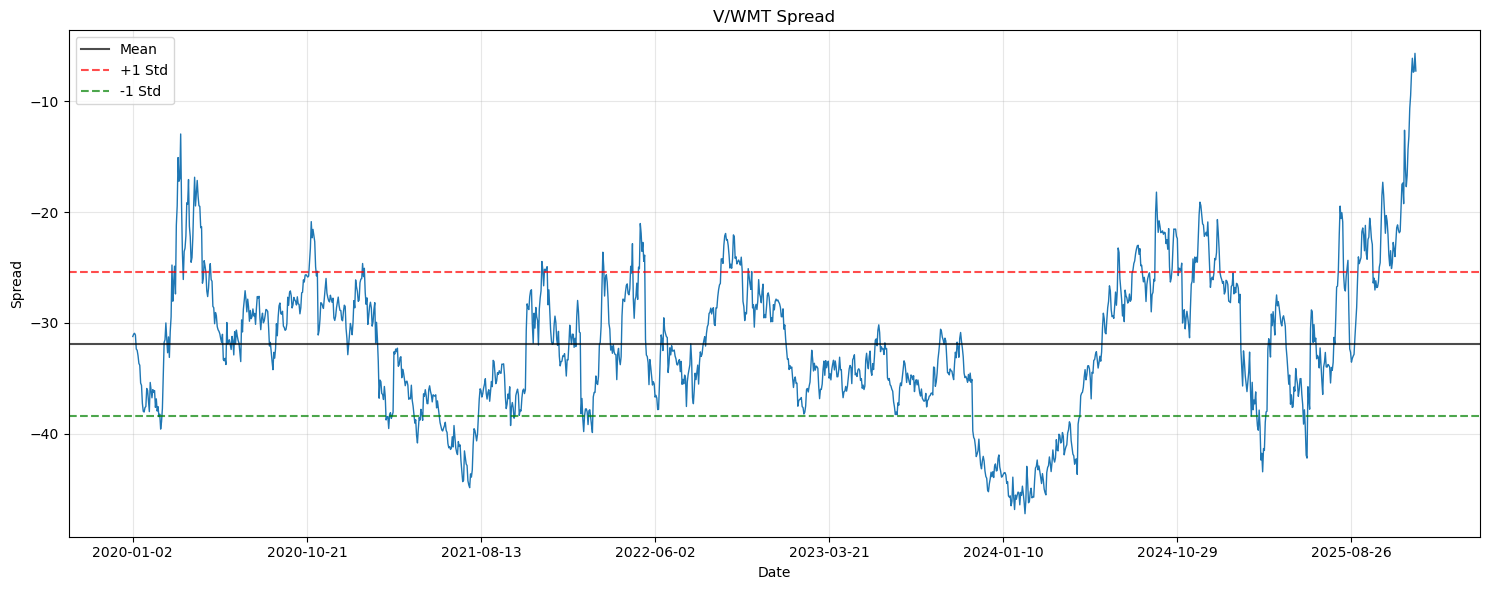

In [14]:
# Plot spread for selected pair
plt.figure(figsize=(15, 6))
spread_pair1.plot(title=f'{symbol1}/{symbol2} Spread', linewidth=1)
plt.axhline(spread_pair1.mean(), color='black', linestyle='-', alpha=0.7, label='Mean')
plt.axhline(spread_pair1.mean() + spread_pair1.std(), color='red', linestyle='--', alpha=0.7, label='+1 Std')
plt.axhline(spread_pair1.mean() - spread_pair1.std(), color='green', linestyle='--', alpha=0.7, label='-1 Std')
plt.ylabel('Spread')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

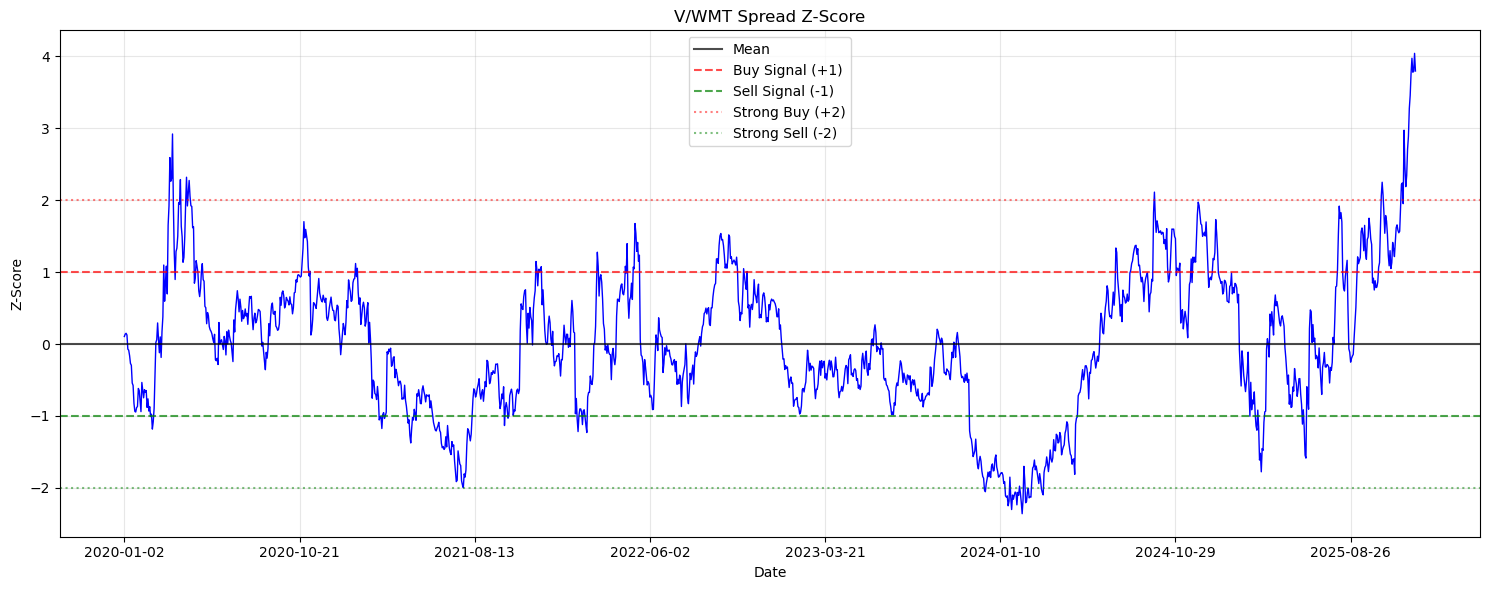

Z-score statistics for V/WMT:
Mean: -0.0000
Std: 1.0003
Min: -2.3592
Max: 4.0437


In [15]:
# Z-score calculation and visualization for selected pair
def zscore(series):
    return (series - series.mean()) / np.std(series)

# Calculate z-score of spread
zscore_pair1 = zscore(spread_pair1)

# Plot z-score
plt.figure(figsize=(15, 6))
zscore_pair1.plot(title=f'{symbol1}/{symbol2} Spread Z-Score', linewidth=1, color='blue')
plt.axhline(zscore_pair1.mean(), color='black', linestyle='-', alpha=0.7, label='Mean')
plt.axhline(1.0, color='red', linestyle='--', alpha=0.7, label='Buy Signal (+1)')
plt.axhline(-1.0, color='green', linestyle='--', alpha=0.7, label='Sell Signal (-1)')
plt.axhline(2.0, color='red', linestyle=':', alpha=0.5, label='Strong Buy (+2)')
plt.axhline(-2.0, color='green', linestyle=':', alpha=0.5, label='Strong Sell (-2)')
plt.ylabel('Z-Score')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Z-score statistics for {symbol1}/{symbol2}:")
print(f"Mean: {zscore_pair1.mean():.4f}")
print(f"Std: {zscore_pair1.std():.4f}")
print(f"Min: {zscore_pair1.min():.4f}")
print(f"Max: {zscore_pair1.max():.4f}")

In [16]:
# Trading Strategy for selected pair
# Create DataFrame with signal and position
trades_pair1 = pd.DataFrame({
    'signal': zscore_pair1,
    'position': spread_pair1,
    symbol1: S1,
    symbol2: S2
})

# Add trading side based on z-score thresholds
trades_pair1['side'] = 0.0
trades_pair1.loc[trades_pair1.signal <= -1, 'side'] = 1.0   # Long spread when z-score <= -1
trades_pair1.loc[trades_pair1.signal >= 1, 'side'] = -1.0   # Short spread when z-score >= 1

# Calculate position changes and returns
trades_pair1['position_change'] = trades_pair1.position.pct_change()
trades_pair1['strategy_returns'] = trades_pair1.position_change * trades_pair1.side.shift(1)

# Remove NaN values
trades_pair1 = trades_pair1.dropna()

print(f"{symbol1}/{symbol2} Trading Signals Summary:")
print(f"Total trading signals: {(trades_pair1.side != 0).sum()}")
print(f"Long signals: {(trades_pair1.side == 1).sum()}")
print(f"Short signals: {(trades_pair1.side == -1).sum()}")
print(f"Signal ratio: {(trades_pair1.side != 0).mean():.2%}")

# Display first few trades
print("\nFirst 10 trading signals:")
signal_trades = trades_pair1[trades_pair1.side != 0].head(10)
print(signal_trades[['signal', 'side', 'strategy_returns']])

V/WMT Trading Signals Summary:
Total trading signals: 432
Long signals: 207
Short signals: 225
Signal ratio: 29.31%

First 10 trading signals:
              signal  side  strategy_returns
Date                                        
2020-02-14 -1.007520   1.0          0.000000
2020-02-19 -1.182584   1.0          0.000000
2020-02-20 -1.080410   1.0         -0.016753
2020-03-09  1.099258  -1.0         -0.000000
2020-03-12  1.083504  -1.0         -0.000000
2020-03-16  1.652934  -1.0         -0.000000
2020-03-17  1.922536  -1.0          0.082616
2020-03-18  2.594085  -1.0          0.224320
2020-03-19  2.264919  -1.0         -0.141750
2020-03-20  2.300990  -1.0          0.013605


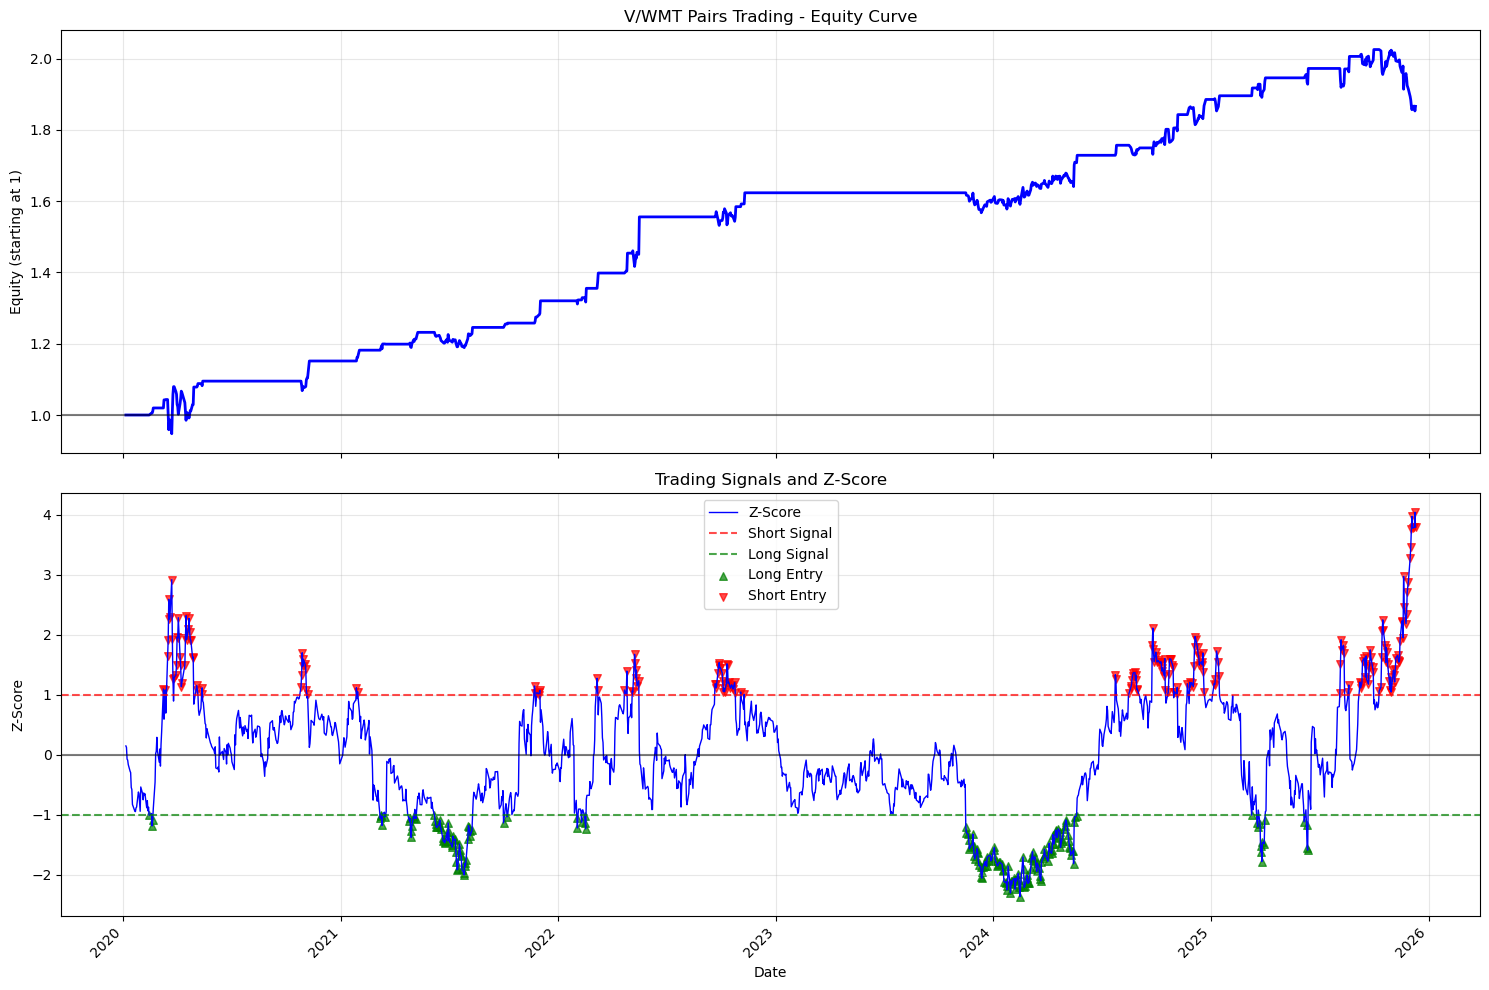


V/WMT Strategy Performance:
Total Return: 0.8660 (86.60%)
Annualized Sharpe Ratio: 1.1509
Maximum Drawdown: -0.0919 (-9.19%)


In [17]:
# Plot strategy performance for selected pair
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Calculate returns properly for pairs trading
# For a pairs trade: Long symbol2, Short symbol1 (when spread is expected to rise)
# Returns = weight2 * return2 - weight1 * return1
# Using equal dollar weights for simplicity

# Calculate individual stock returns
returns_S1 = S1.pct_change()
returns_S2 = S2.pct_change()

# Align with trades_pair1 index
returns_S1 = returns_S1.reindex(trades_pair1.index)
returns_S2 = returns_S2.reindex(trades_pair1.index)

# Strategy returns: when side=1 (long spread), we're long S2, short S1
# when side=-1 (short spread), we're short S2, long S1
# Use equal weights (0.5 each side)
trades_pair1['strategy_returns'] = trades_pair1.side.shift(1) * 0.5 * (returns_S2 - returns_S1)
trades_pair1 = trades_pair1.dropna()

# Ensure index is datetime for proper date formatting
if not isinstance(trades_pair1.index, pd.DatetimeIndex):
    trades_pair1.index = pd.to_datetime(trades_pair1.index)

# Plot cumulative returns using equity curve
equity_curve = (1 + trades_pair1.strategy_returns).cumprod()
axes[0].plot(trades_pair1.index, equity_curve, linewidth=2, color='blue')
axes[0].set_title(f'{symbol1}/{symbol2} Pairs Trading - Equity Curve')
axes[0].axhline(1, color='black', linestyle='-', alpha=0.5)
axes[0].set_ylabel('Equity (starting at 1)')
axes[0].grid(True, alpha=0.3)

# Plot signals with z-score
axes[1].plot(trades_pair1.index, trades_pair1.signal, linewidth=1, color='blue', label='Z-Score')
axes[1].axhline(1.0, color='red', linestyle='--', alpha=0.7, label='Short Signal')
axes[1].axhline(-1.0, color='green', linestyle='--', alpha=0.7, label='Long Signal')
axes[1].axhline(0, color='black', linestyle='-', alpha=0.5)

# Mark actual trades
long_trades = trades_pair1[trades_pair1.side == 1]
short_trades = trades_pair1[trades_pair1.side == -1]
axes[1].scatter(long_trades.index, long_trades.signal, color='green', marker='^', s=30, alpha=0.7, label='Long Entry')
axes[1].scatter(short_trades.index, short_trades.signal, color='red', marker='v', s=30, alpha=0.7, label='Short Entry')

axes[1].set_title('Trading Signals and Z-Score')
axes[1].set_ylabel('Z-Score')
axes[1].set_xlabel('Date')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Fix overlapping dates
fig.autofmt_xdate(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Performance metrics (CORRECTED)
# Total return (compounded)
total_return = equity_curve.iloc[-1] - 1

# Sharpe ratio
sharpe_ratio = trades_pair1.strategy_returns.mean() / trades_pair1.strategy_returns.std() * np.sqrt(252)

# Max drawdown (from equity curve)
rolling_max = equity_curve.expanding().max()
drawdown = (equity_curve - rolling_max) / rolling_max
max_drawdown = drawdown.min()

print(f"\n{symbol1}/{symbol2} Strategy Performance:")
print(f"Total Return: {total_return:.4f} ({total_return*100:.2f}%)")
print(f"Annualized Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f} ({max_drawdown*100:.2f}%)")

In [18]:
# # Alternative analysis using ratio of stocks. Then apply RSI on the ratio. to confirm entries/exits
# # Function to calculate the ratio of the best_pair, symbol1/symbol2
# def calculate_ratio(data, symbol1, symbol2):
#     ratio = data[symbol1] / data[symbol2]
#     return ratio

# ratio_series = calculate_ratio(data, symbol1, symbol2)

# # Plot the ratio series
# plt.figure(figsize=(15, 6))
# ratio_series.plot(title=f'{symbol1}/{symbol2} Price Ratio', linewidth=1, color='purple')
# plt.ylabel('Price Ratio')
# plt.xlabel('Date')
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

In [19]:
# # Function to calculate RSI of the ratio series
# def calculate_rsi(series, window=3):
#     delta = series.diff()
#     gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
#     loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
#     rs = gain / loss
#     rsi = 100 - (100 / (1 + rs))
#     return rsi

# rsi_ratio = calculate_rsi(ratio_series)

# # Plot RSI of the ratio series
# plt.figure(figsize=(15, 6)) 
# rsi_ratio.plot(title=f'{symbol1}/{symbol2} Price Ratio RSI', linewidth=1, color='orange')
# plt.axhline(70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
# plt.axhline(30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
# plt.ylabel('RSI')
# plt.xlabel('Date')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()


=== BACKTESTING RSI RATIO STRATEGY: V/WMT ===
RSI Window: 3, Overbought: 70, Oversold: 30
Training period: 2020-01-02 to 2024-02-26
Testing period: 2024-02-27 to 2025-12-10

=== OUT-OF-SAMPLE RESULTS ===
Total Return: 0.0371 (3.71%)
Annualized Sharpe Ratio: 0.2551
Maximum Drawdown: -0.1486 (-14.86%)
Win Rate: 53.90%

Trade Distribution:
  Long Ratio (RSI < 30): 164 days
  Short Ratio (RSI > 70): 130 days
  Neutral: 148 days


=== BACKTESTING RSI RATIO STRATEGY: V/WMT ===
RSI Window: 2, Overbought: 70, Oversold: 30
Training period: 2020-01-02 to 2024-02-26
Testing period: 2024-02-27 to 2025-12-10

=== OUT-OF-SAMPLE RESULTS ===
Total Return: 0.1345 (13.45%)
Annualized Sharpe Ratio: 0.7318
Maximum Drawdown: -0.1507 (-15.07%)
Win Rate: 52.06%

Trade Distribution:
  Long Ratio (RSI < 30): 186 days
  Short Ratio (RSI > 70): 153 days
  Neutral: 103 days


=== BACKTESTING RSI RATIO STRATEGY: V/WMT ===
RSI Window: 2, Overbought: 80, Oversold: 20
Training period: 2020-01-02 to 2024-02-26
Testin

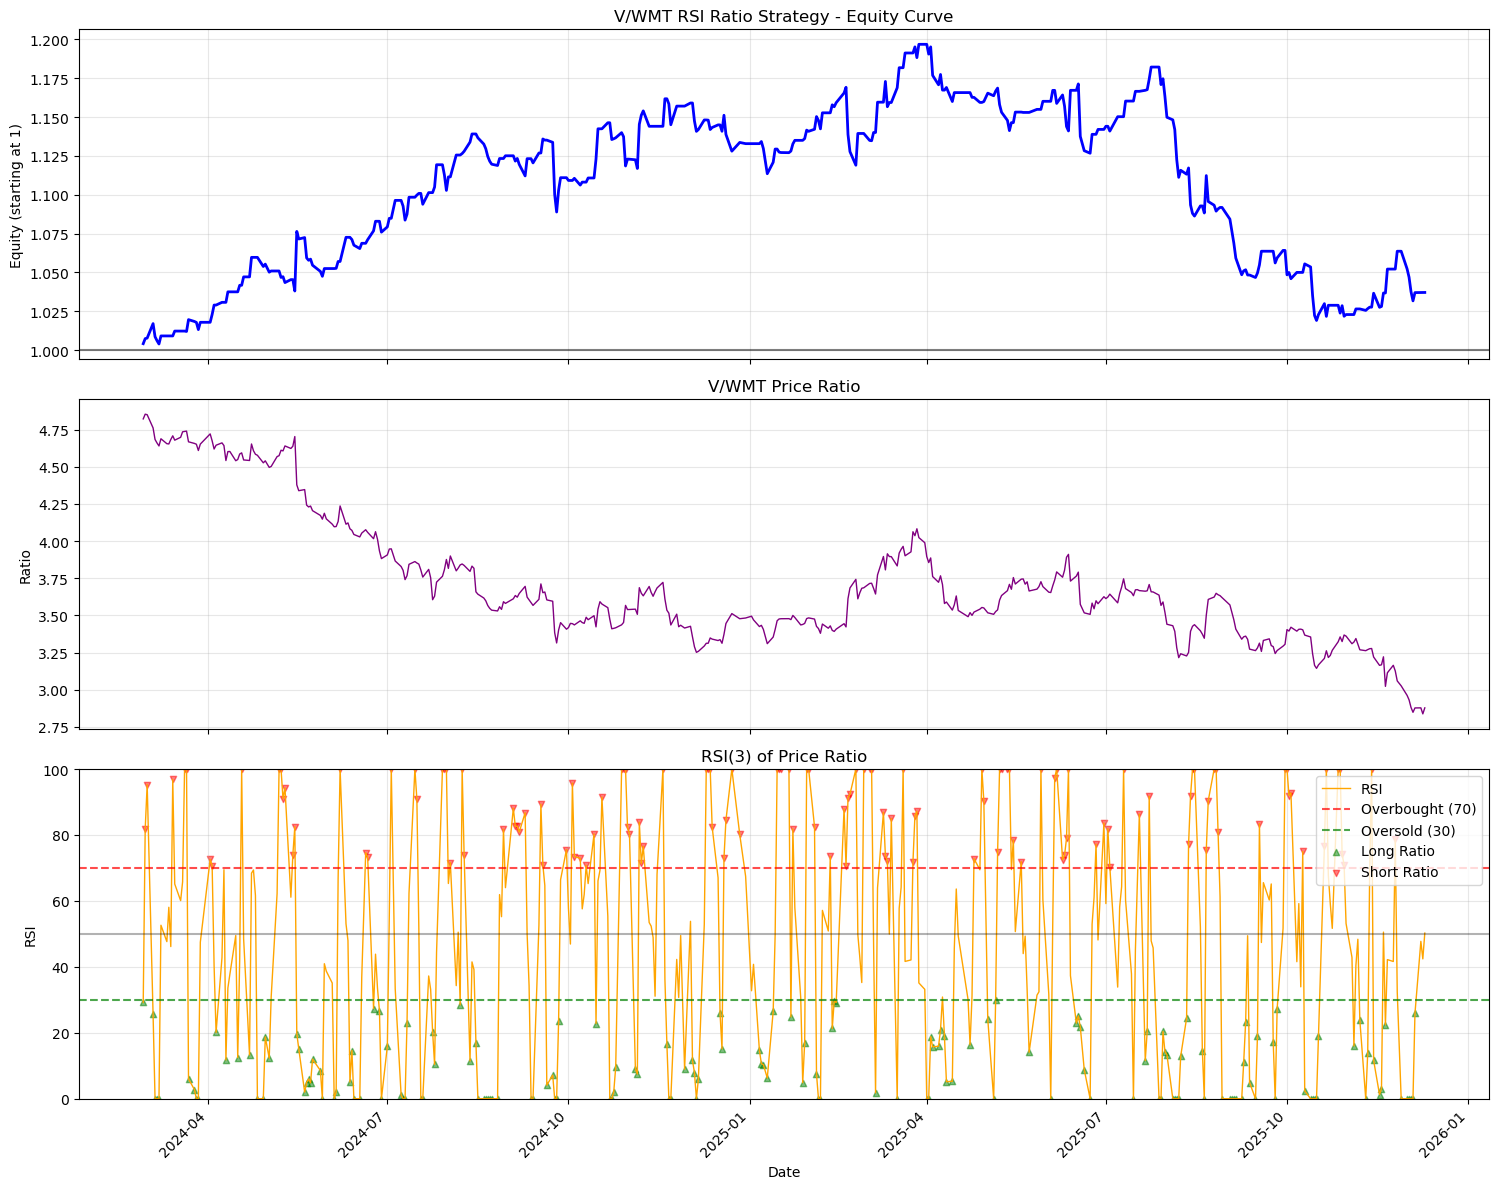


=== RSI RATIO STRATEGY SUMMARY ===
Pair: V/WMT
RSI Window: 3
Total Return: 3.71%
Annualized Sharpe: 0.2551
Max Drawdown: -14.86%
Win Rate: 53.90%


In [21]:
def backtest_rsi_ratio_strategy(data, symbol1, symbol2, rsi_window=3, 
                                 overbought=70, oversold=30, 
                                 train_ratio=0.7):
    """
    Backtest a pairs trading strategy using RSI on the price ratio.
    
    Strategy Logic:
    - When RSI < oversold (30): Long ratio (Long symbol1, Short symbol2)
    - When RSI > overbought (70): Short ratio (Short symbol1, Long symbol2)
    
    Parameters:
    - data: DataFrame with price data
    - symbol1, symbol2: Ticker symbols for the pair
    - rsi_window: RSI calculation period (default 3)
    - overbought: RSI level to trigger short (default 70)
    - oversold: RSI level to trigger long (default 30)
    - train_ratio: Proportion of data for training (default 0.7)
    
    Returns:
    - Dictionary with backtest results
    """
    print(f"\n=== BACKTESTING RSI RATIO STRATEGY: {symbol1}/{symbol2} ===")
    print(f"RSI Window: {rsi_window}, Overbought: {overbought}, Oversold: {oversold}")
    
    # Calculate price ratio
    ratio = data[symbol1] / data[symbol2]
    
    # Calculate RSI of the ratio
    delta = ratio.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=rsi_window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=rsi_window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    
    # Split into train/test
    n_train = int(len(data) * train_ratio)
    split_date = data.index[n_train - 1]
    
    print(f"Training period: {data.index[0]} to {split_date}")
    print(f"Testing period: {data.index[n_train]} to {data.index[-1]}")
    
    # Create signals DataFrame (test period only for out-of-sample results)
    signals = pd.DataFrame(index=data.index[n_train:])
    signals['ratio'] = ratio.iloc[n_train:]
    signals['rsi'] = rsi.iloc[n_train:]
    signals[symbol1] = data[symbol1].iloc[n_train:]
    signals[symbol2] = data[symbol2].iloc[n_train:]
    
    # Generate trading signals
    signals['position'] = 0.0
    
    # Long ratio (long symbol1, short symbol2) when RSI oversold
    signals.loc[signals.rsi <= oversold, 'position'] = 1.0
    
    # Short ratio (short symbol1, long symbol2) when RSI overbought
    signals.loc[signals.rsi >= overbought, 'position'] = -1.0
    
    # Calculate individual stock returns
    returns_S1 = data[symbol1].pct_change().iloc[n_train:]
    returns_S2 = data[symbol2].pct_change().iloc[n_train:]
    
    # Align returns with signals
    returns_S1 = returns_S1.reindex(signals.index)
    returns_S2 = returns_S2.reindex(signals.index)
    
    # Strategy returns:
    # When position=1 (long ratio): long symbol1, short symbol2 → returns = (ret_S1 - ret_S2) / 2
    # When position=-1 (short ratio): short symbol1, long symbol2 → returns = (ret_S2 - ret_S1) / 2
    signals['strategy_returns'] = signals.position.shift(1) * 0.5 * (returns_S1 - returns_S2)
    signals = signals.dropna()
    
    # Calculate equity curve
    signals['equity_curve'] = (1 + signals.strategy_returns).cumprod()
    
    # Performance metrics
    total_return = signals.equity_curve.iloc[-1] - 1
    
    sharpe_ratio = (signals.strategy_returns.mean() / signals.strategy_returns.std() * np.sqrt(252) 
                   if signals.strategy_returns.std() != 0 else 0)
    
    # Max drawdown
    rolling_max = signals.equity_curve.expanding().max()
    drawdown = (signals.equity_curve - rolling_max) / rolling_max
    max_drawdown = drawdown.min()
    
    # Win rate
    winning_trades = signals[signals.strategy_returns > 0].shape[0]
    total_trades = signals[signals.strategy_returns != 0].shape[0]
    win_rate = winning_trades / total_trades if total_trades > 0 else 0
    
    # Trade statistics
    n_long = (signals.position == 1).sum()
    n_short = (signals.position == -1).sum()
    n_neutral = (signals.position == 0).sum()
    
    print(f"\n=== OUT-OF-SAMPLE RESULTS ===")
    print(f"Total Return: {total_return:.4f} ({total_return*100:.2f}%)")
    print(f"Annualized Sharpe Ratio: {sharpe_ratio:.4f}")
    print(f"Maximum Drawdown: {max_drawdown:.4f} ({max_drawdown*100:.2f}%)")
    print(f"Win Rate: {win_rate:.2%}")
    print(f"\nTrade Distribution:")
    print(f"  Long Ratio (RSI < {oversold}): {n_long} days")
    print(f"  Short Ratio (RSI > {overbought}): {n_short} days")
    print(f"  Neutral: {n_neutral} days")
    
    return {
        'signals': signals,
        'total_return': total_return,
        'sharpe_ratio': sharpe_ratio,
        'max_drawdown': max_drawdown,
        'win_rate': win_rate,
        'split_date': split_date,
        'rsi_window': rsi_window,
        'overbought': overbought,
        'oversold': oversold
    }


def plot_rsi_ratio_backtest(results, symbol1, symbol2):
    """
    Plot the RSI ratio strategy backtest results.
    """
    signals = results['signals']
    
    # Ensure datetime index
    if not isinstance(signals.index, pd.DatetimeIndex):
        signals.index = pd.to_datetime(signals.index)
    
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    
    # Plot 1: Equity Curve
    axes[0].plot(signals.index, signals.equity_curve, linewidth=2, color='blue')
    axes[0].set_title(f'{symbol1}/{symbol2} RSI Ratio Strategy - Equity Curve')
    axes[0].axhline(1, color='black', linestyle='-', alpha=0.5)
    axes[0].set_ylabel('Equity (starting at 1)')
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Price Ratio
    axes[1].plot(signals.index, signals.ratio, linewidth=1, color='purple')
    axes[1].set_title(f'{symbol1}/{symbol2} Price Ratio')
    axes[1].set_ylabel('Ratio')
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: RSI with signals
    axes[2].plot(signals.index, signals.rsi, linewidth=1, color='orange', label='RSI')
    axes[2].axhline(results['overbought'], color='red', linestyle='--', alpha=0.7, 
                    label=f'Overbought ({results["overbought"]})')
    axes[2].axhline(results['oversold'], color='green', linestyle='--', alpha=0.7, 
                    label=f'Oversold ({results["oversold"]})')
    axes[2].axhline(50, color='black', linestyle='-', alpha=0.3)
    
    # Mark trade entries
    long_signals = signals[signals.position == 1]
    short_signals = signals[signals.position == -1]
    axes[2].scatter(long_signals.index, long_signals.rsi, color='green', marker='^', 
                    s=20, alpha=0.5, label='Long Ratio')
    axes[2].scatter(short_signals.index, short_signals.rsi, color='red', marker='v', 
                    s=20, alpha=0.5, label='Short Ratio')
    
    axes[2].set_title(f'RSI({results["rsi_window"]}) of Price Ratio')
    axes[2].set_ylabel('RSI')
    axes[2].set_xlabel('Date')
    axes[2].set_ylim(0, 100)
    axes[2].legend(loc='upper right')
    axes[2].grid(True, alpha=0.3)
    
    fig.autofmt_xdate(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print(f"\n=== RSI RATIO STRATEGY SUMMARY ===")
    print(f"Pair: {symbol1}/{symbol2}")
    print(f"RSI Window: {results['rsi_window']}")
    print(f"Total Return: {results['total_return']:.2%}")
    print(f"Annualized Sharpe: {results['sharpe_ratio']:.4f}")
    print(f"Max Drawdown: {results['max_drawdown']:.2%}")
    print(f"Win Rate: {results['win_rate']:.2%}")


# Run the RSI ratio backtest
rsi_results = backtest_rsi_ratio_strategy(
    data, symbol1, symbol2, 
    rsi_window=3, 
    overbought=70, 
    oversold=30,
    train_ratio=0.7
)

# Test different RSI windows and thresholds
for rsi_window in [2, 3, 5]:
    for overbought, oversold in [(70, 30), (80, 20), (75, 25)]:
        print(f"\n{'='*60}")
        results = backtest_rsi_ratio_strategy(
            data, symbol1, symbol2,
            rsi_window=rsi_window,
            overbought=overbought,
            oversold=oversold,
            train_ratio=0.7
        )

# Plot results
plot_rsi_ratio_backtest(rsi_results, symbol1, symbol2)